In [33]:
#Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from python_speech_features import mfcc
import math
import random
import os
import operator

In [34]:
#The dataframe we are dealing with for training and testing respectively

df_30_sec= pd.read_csv('../Data/features_30_sec.csv')
df_3_sec = pd.read_csv('../Data/features_3_sec.csv')


In [35]:
#Creating labels and The data matrix for training

X_train = df_30_sec.drop(columns= ['filename','label','length'])
y_train = df_30_sec['label']

X_test = df_3_sec.drop(columns = ['filename','label','length'])
y_test = df_3_sec['label']

In [36]:
#creating the logistic regression model using scikit-learn
x_scaler  = StandardScaler()
X_train,X_test = x_scaler.fit_transform(X_train),x_scaler.fit_transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [37]:
#Prediction of the X_test samples

y_predictions = model.predict(X_test)

acc = accuracy_score(y_test,y_predictions)

print("percentage accuracy:",'{:.2f}'.format(acc*100)," %")

percentage accuracy: 66.99  %


9990
Barebones confusion matrix:
 [[685   4  52  28  32  48  38   2  55  56]
 [  8 827  16   2   0 131   0   1   0  13]
 [ 75  12 593  45  18  50   3  29  46 126]
 [ 24   4  39 614  81   5  22  51  42 117]
 [ 43   4  22  48 637   2  33  49 141  19]
 [ 57  78  85  25   5 686   0  11  11  42]
 [ 35   1  14  49  21   3 773   0  11  93]
 [  1   3  56  66  63  10   0 735  36  30]
 [ 35   5  52  56 119  16   4  51 607  55]
 [ 66   7  93  99  45  37  40  23  53 535]]


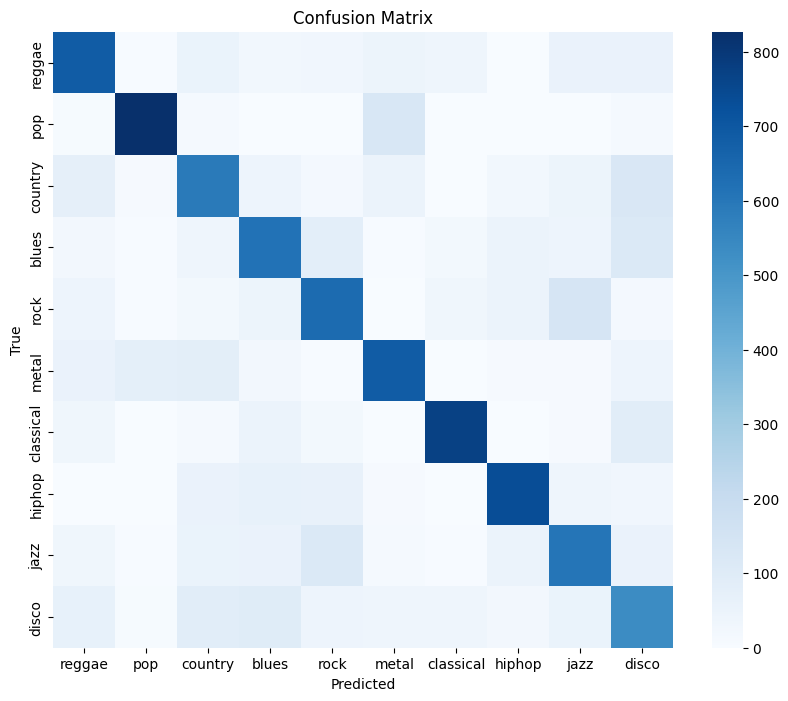

In [38]:
conf_matrix = confusion_matrix(y_test, y_predictions)
print(len(y_test))
# Plot confusion matrix
print("Barebones confusion matrix:\n",conf_matrix)
class_names = list(set(y_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='g',cbar = True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
#Classification Report is:
print(classification_report(y_test,y_predictions))


              precision    recall  f1-score   support

       blues       0.67      0.69      0.68      1000
   classical       0.88      0.83      0.85       998
     country       0.58      0.59      0.59       997
       disco       0.59      0.61      0.60       999
      hiphop       0.62      0.64      0.63       998
        jazz       0.69      0.69      0.69      1000
       metal       0.85      0.77      0.81      1000
         pop       0.77      0.73      0.75      1000
      reggae       0.61      0.61      0.61      1000
        rock       0.49      0.54      0.51       998

    accuracy                           0.67      9990
   macro avg       0.68      0.67      0.67      9990
weighted avg       0.68      0.67      0.67      9990

